Nome/RA: Antonio Marcio Crepaldi Junior 21012485


Nome/RA: André Luís Bianchini Filho 21002612

Vamos avaliar alguns indicadores sócios-económicos (inflação, PIB per capita, Crescimento do PIB e desemprego) dos países no ano de 2018, disponíveis na base de dados do Banco Mundial, World_Bank.csv.

a) Descreva os dados utilizando ferramentas descritivas e exploratórias adequadas,observando a natureza das variáveis presentes no conjunto de dados.

b) Desenvolva um agrupamento hierárqico via dendrograma. Determine o número de clusters adequado. Justifique sua resposta, identificando qual foi o critério utilizado.

c) Considere um subconjunto dos dados com os seguintes países: Brasil, China, Uruguai, Paraguai, Chile, Peru, Bolívia, Equador, Colombia, Alemanha, Estados Unidos, Reino Unido, Polônia.
Desenvolva analises de agrupamentos utilizando técnicas hierárquicas. Justifique adequadamente a escolha da quantidade de grupos.

In [45]:
# ! pip install geopandas

In [46]:
# ! pip install descartes

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import geopandas

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/master/Dados/World_Bank.csv",sep=' ')
df.head()

,inflacao,pib_per_capita,crescimento_pib,desemprego
United Arab Emirates,3.068147,43004.948646,1.423840,2.575
Albania,2.020790,5253.630064,4.004413,13.898
Armenia,2.520234,4212.070943,5.200000,17.712
Angola,20.190374,3432.385736,-2.133493,7.253
Austria,1.998382,51512.905475,2.729083,4.786


In [49]:
df.shape

(134, 4)

Questão 1)

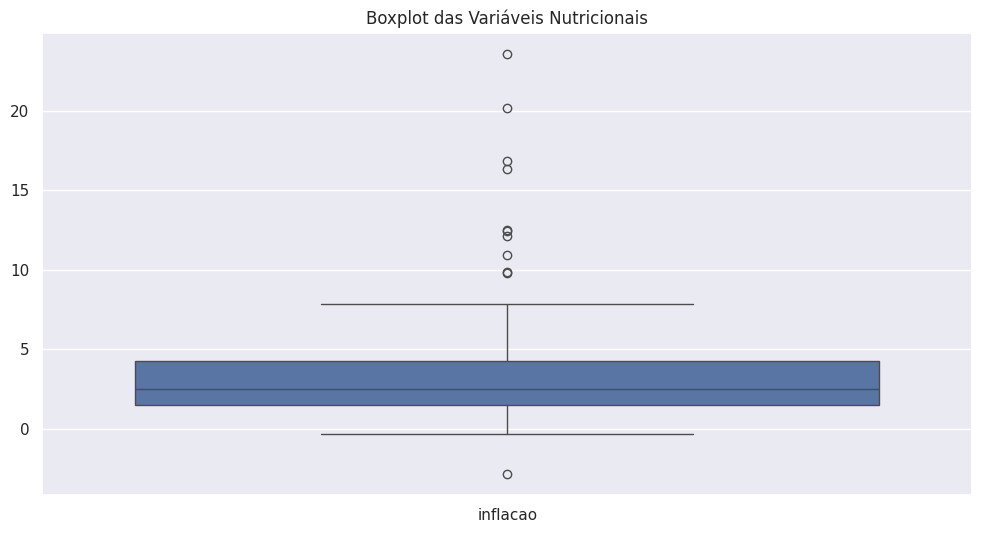

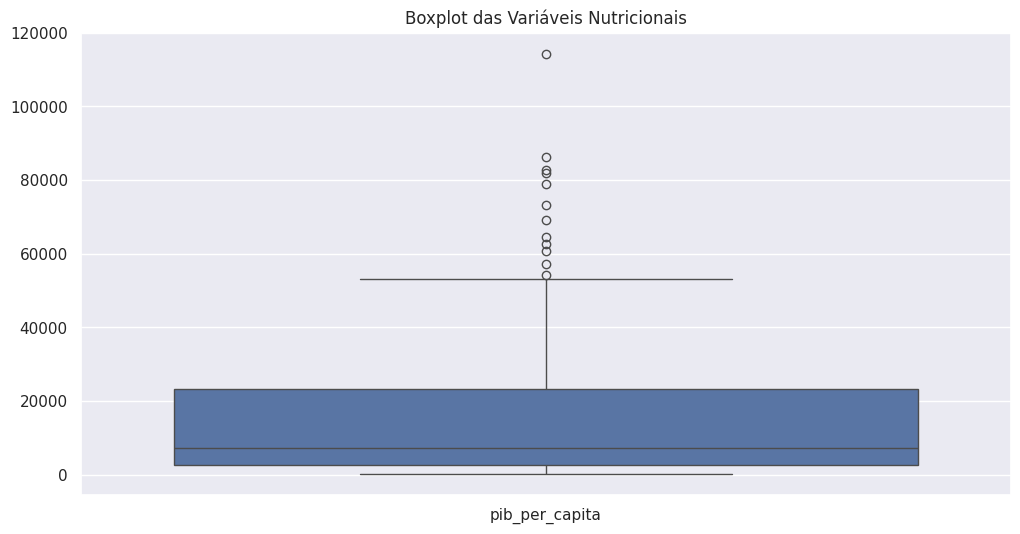

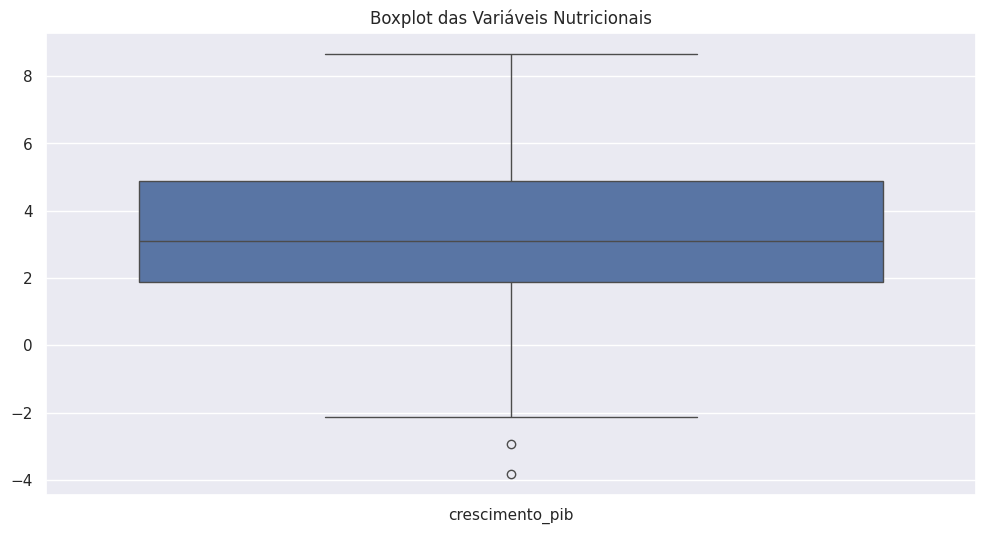

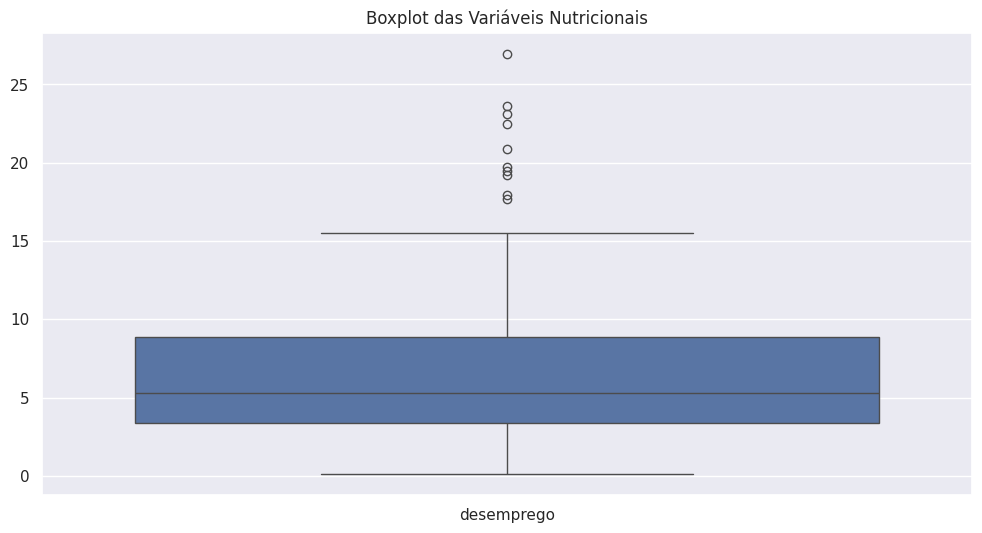

In [50]:
# Criar um boxplot para todas as colunas numéricas
eu = ["inflacao","pib_per_capita","crescimento_pib","desemprego"]
for i in range(4):
  plt.figure(figsize=(12, 6))
  sns.boxplot(data=df[[eu[i]]])
  plt.title('Boxplot das Variáveis Nutricionais')
  plt.show()




PODEMOS VER A PRESENÇA DE DIVERSOS OUTLIERS EM TODAS AS VARIAVEIS, SINALIZANDO UMA ALTA DISPARIDADE ENTRE OS DADOS

In [51]:
import pandas as pd

# Verificar a presença de valores nulos
print(df.isnull().sum())

# Obter estatísticas descritivas básicas
print(df.describe())

inflacao           0
pib_per_capita     0
crescimento_pib    0
desemprego         0
dtype: int64
         inflacao  pib_per_capita  crescimento_pib  desemprego
count  134.000000      134.000000       134.000000  134.000000
mean     3.561733    17596.639838         3.408318    6.846358
std      3.797585    22718.772784         2.228776    5.373266
min     -2.814698      275.429603        -3.815710    0.142000
25%      1.507143     2564.751352         1.892515    3.373500
50%      2.517135     7253.779541         3.110311    5.324000
75%      4.283929    23128.944589         4.876709    8.891250
max     23.563515   114340.498742         8.671683   26.958000


EM MÉDIA EM TODOS ESSES 134 PAISES  A MÉDIA DO CRESCIMENTO DO PIB É MENOR QUE A MÉDIA DA INFLAÇÃO, DEMONSTRANDO UMA SITUAÇÃO ECONOMICA DESFAVORAVEL

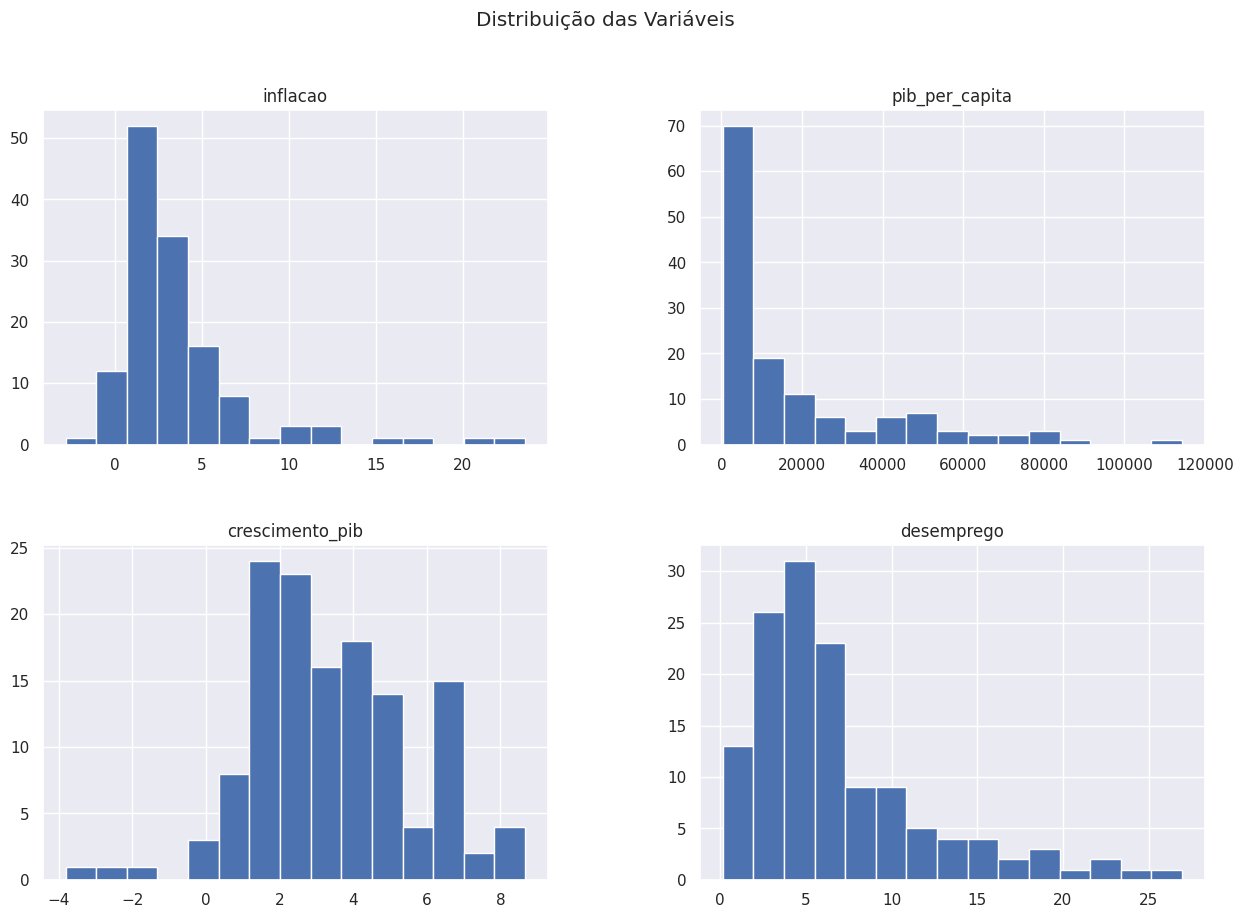

In [52]:
# Calcular média, mediana, desvio padrão para cada variável
stats = df.describe().T
stats['median'] = df.median()
stats['mode'] = df.mode().iloc[0]
stats

# Visualizar a distribuição das variáveis usando histogramas e boxplots
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis')
plt.show()




Questão 2)

TODOS OS METODOS E

In [53]:
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)

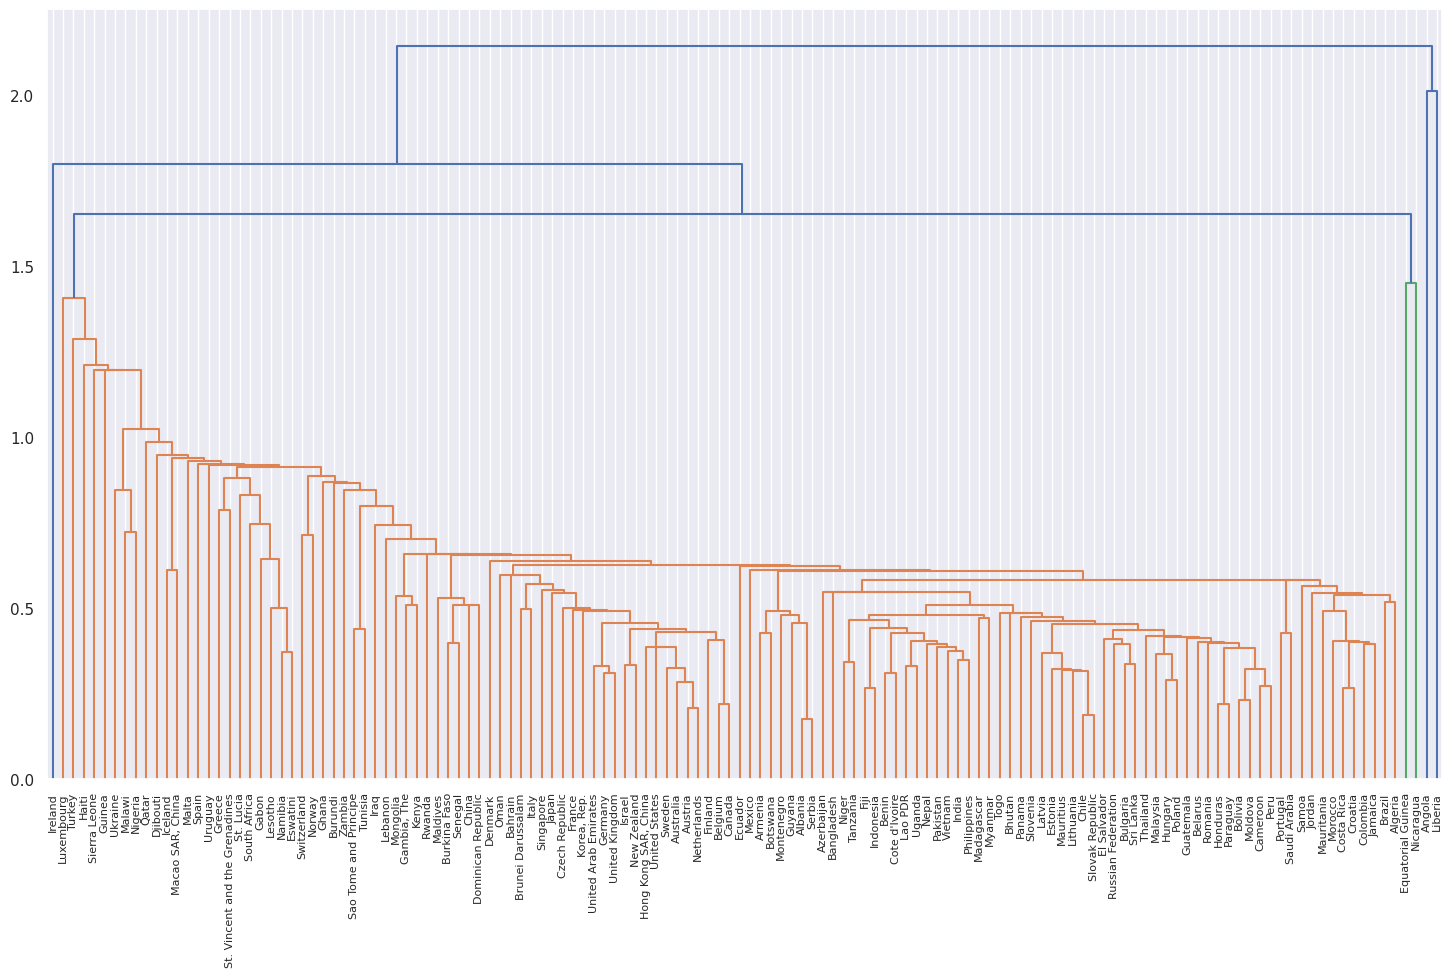

In [55]:
# O código abaixo considera o método do vizinho mais próximo na Análise de Agrupamento.
# Refaça o dendrograma considerando os outros métodos. Qual método ficou melhor para o estudo. Discuta.
# Quantos grupos é adequado? Justifique sua resposta, identificando qual foi o critério utilizado.
# method='single' (vizinho + próximo)
# 'complete''(vizinho + distante)
# 'average' (distância média)
# 'weighted' (also caled WPGMA)
# 'centroid'
# 'median'
# 'ward''
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)
Z = hierarchy.linkage(df_scaled, 'single')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

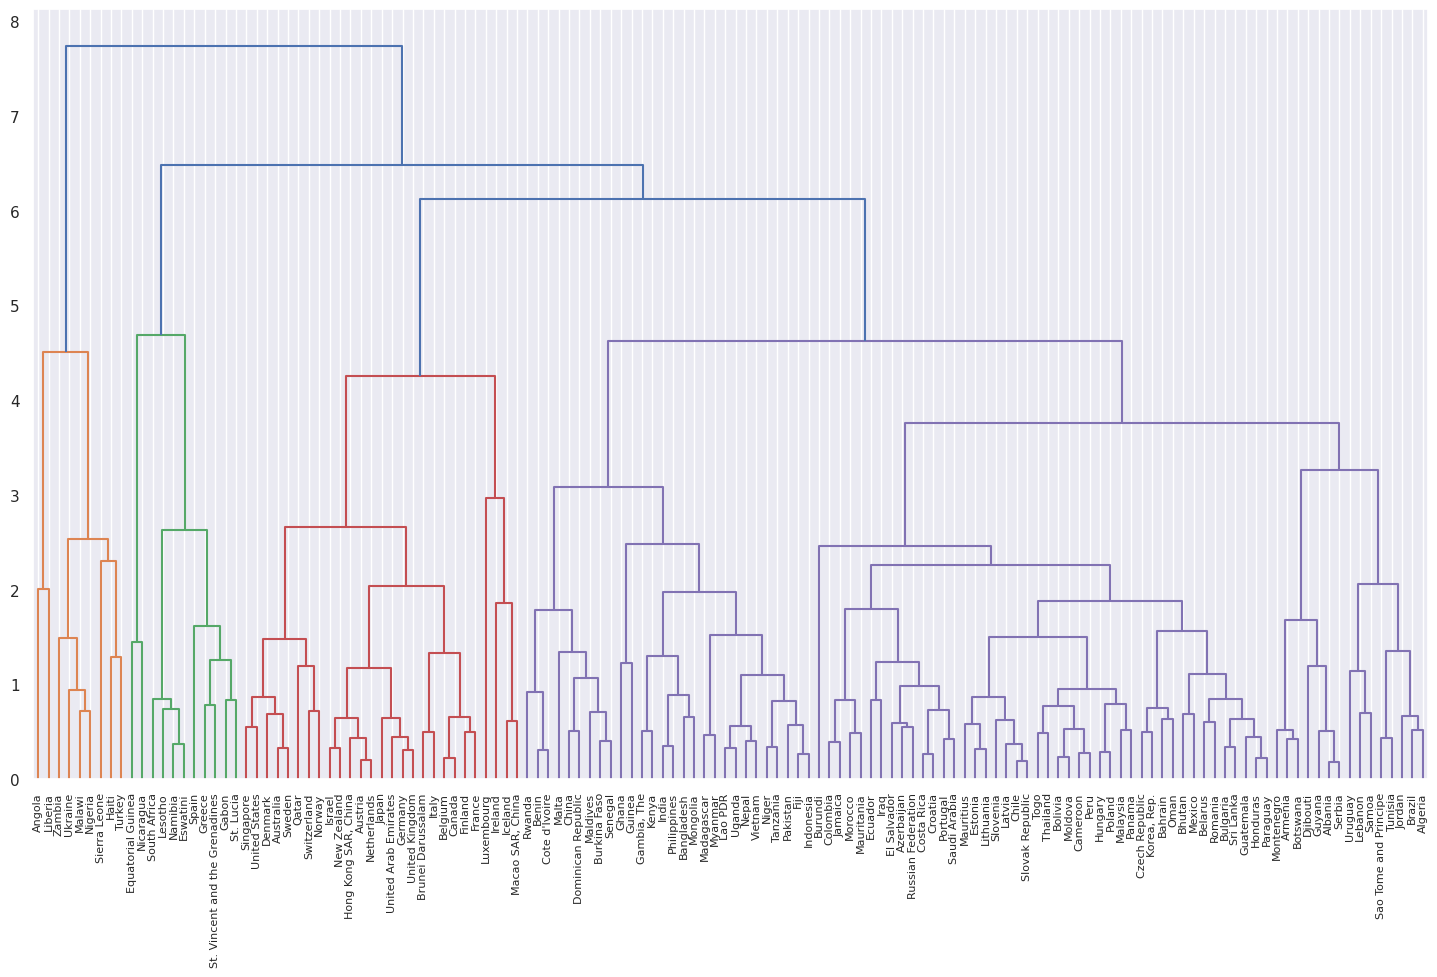

In [56]:
# O código abaixo considera o método do vizinho mais próximo na Análise de Agrupamento.
# Refaça o dendrograma considerando os outros métodos. Qual método ficou melhor para o estudo. Discuta.
# Quantos grupos é adequado? Justifique sua resposta, identificando qual foi o critério utilizado.
# method='single' (vizinho + próximo)
# 'complete''(vizinho + distante)
# 'average' (distância média)
# 'weighted' (also caled WPGMA)
# 'centroid'
# 'median'
# 'ward''
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)
Z = hierarchy.linkage(df_scaled, 'complete')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

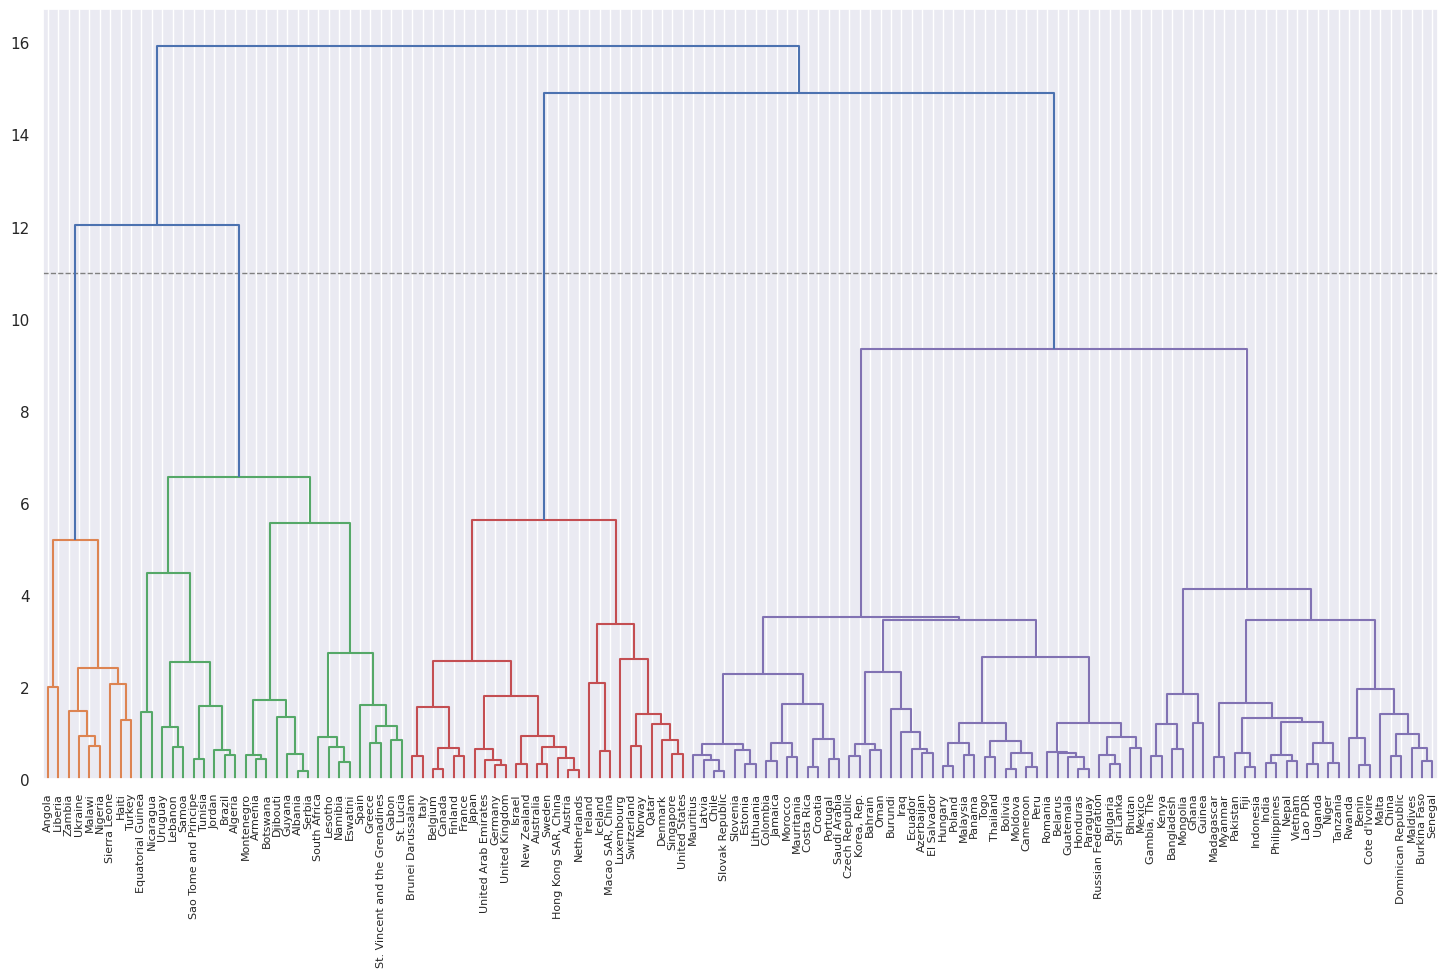

In [67]:
# O código abaixo considera o método do vizinho mais próximo na Análise de Agrupamento.
# Refaça o dendrograma considerando os outros métodos. Qual método ficou melhor para o estudo. Discuta.
# Quantos grupos é adequado? Justifique sua resposta, identificando qual foi o critério utilizado.
# method='single' (vizinho + próximo)
# 'complete''(vizinho + distante)
# 'average' (distância média)
# 'weighted' (also caled WPGMA)
# 'centroid'
# 'median'
# 'ward''
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)
Z = hierarchy.linkage(df_scaled, 'ward')
plt.figure(figsize=(18, 10))
plt.axhline(y=11,c='grey',lw=1,linestyle='dashed')
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

o METODO WARD FOI ESCOLHIDO DEVIDO A DEFINIÇÃO NA HORA DE CRIAR OS GRUPOS, SENDO O WARD O MAIS ADEQUADO. 4 CLUSTERS CORTANDO NA ALTURA 11, VISTO QUE HÁ O MAIOR GAP

Questão 3

In [57]:
paises_interesse = ['Brazil',
                    'China',
                    'Uruguay',
                    'Paraguay',
                    'Chile',
                    'Peru',
                    'Bolivia',
                    'Ecuador',
                    'Colombia',
                    'Germany',
                    'United States',
                    'United Kingdom',
                    'Poland']

df_paises = df_scaled.loc[paises_interesse, :]
print(df_paises.shape)


(13, 4)


In [58]:
# O código abaixo considera o método do vizinho mais próximo na Análise de Agrupamento.
# Refaça o dendrograma considerando os outros métodos. Qual método ficou melhor para o estudo. Discuta.
# Quantos grupos é adequado? Justifique sua resposta, identificando qual foi o critério utilizado.

In [59]:
# method='single' (vizinho + próximo)
# 'complete''(vizinho + distante)
# 'average' (distância média)
# 'weighted' (also caled WPGMA)
# 'centroid'
# 'median'
# 'ward''

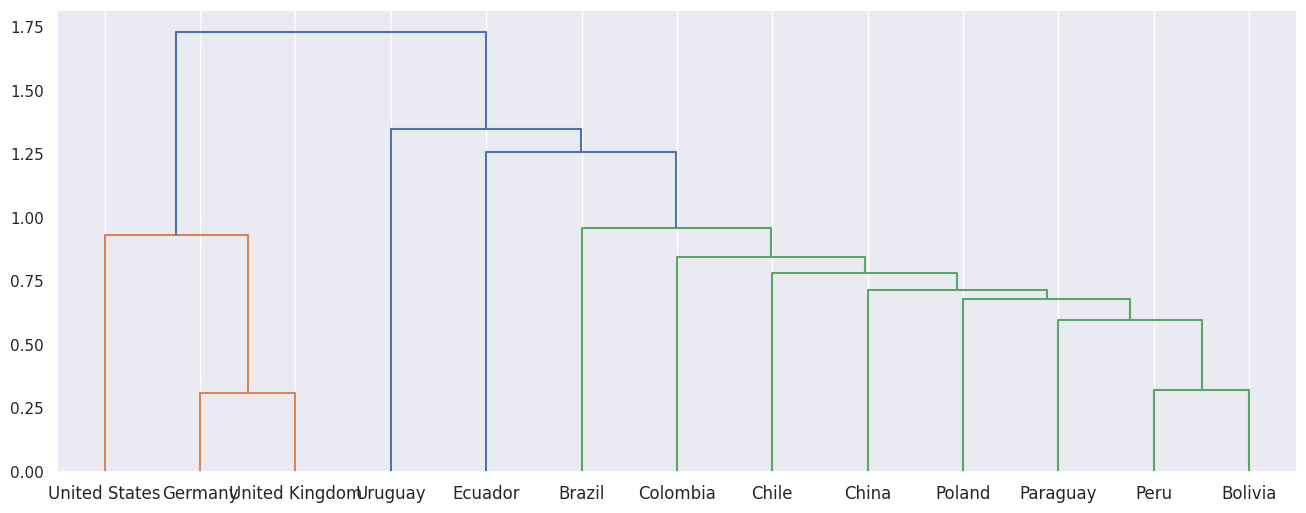

In [60]:
Z = hierarchy.linkage(df_paises, 'single')
plt.figure(figsize=(16, 6))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)

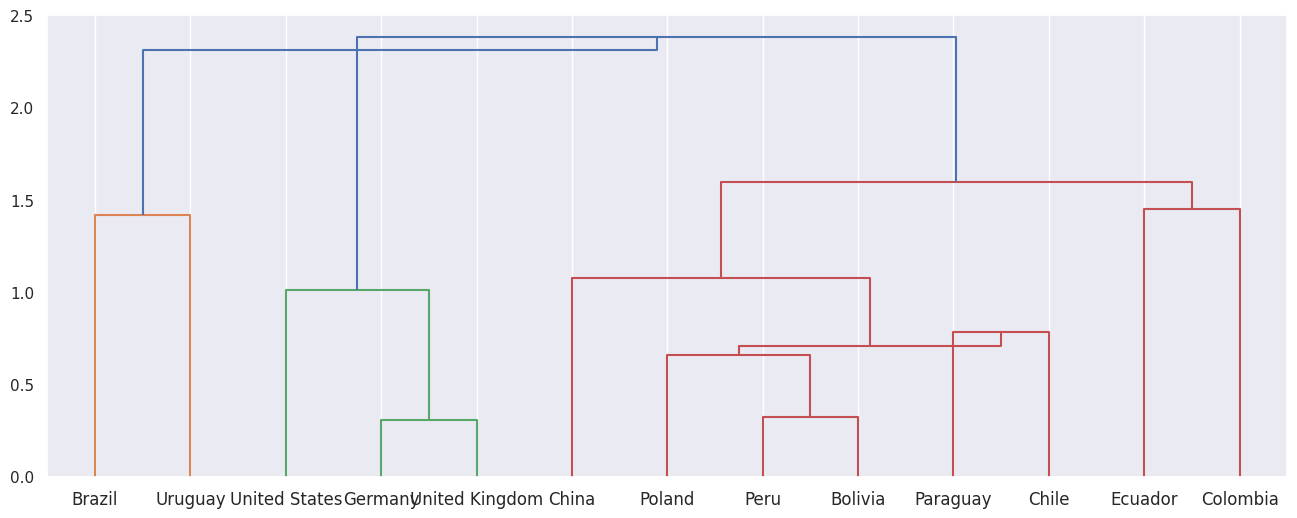

In [68]:
Z = hierarchy.linkage(df_paises, 'median')
plt.figure(figsize=(16, 6))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)

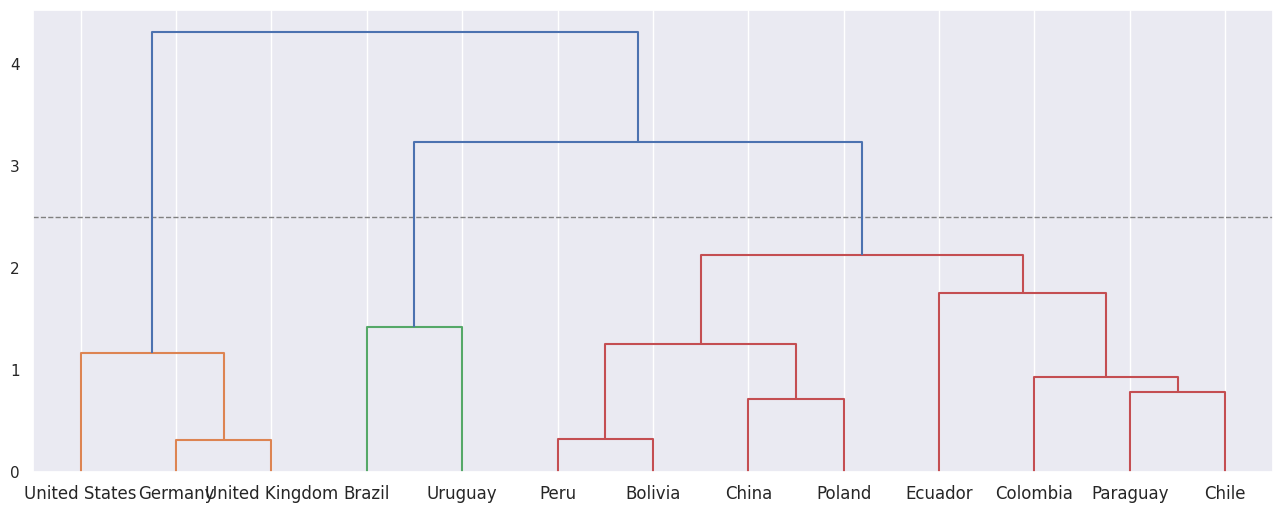

In [62]:
Z = hierarchy.linkage(df_paises, 'ward')
plt.figure(figsize=(16, 6))
plt.axhline(y=2.5,c='grey',lw=1,linestyle='dashed')
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)

o MELHOR METODO NOVAMENTE FOI O WARD, POIS CRIOU GRUPOS BEM DEFINIDOS E COERENTES. EX: O PAISES MAIS DESENVOLVIDOS FICARAM NO GRUPO LARANJA, OS MÉDIAMENTE DESENVOLIDOS ESTÃO NO VERDE E POR FIM OS MENOS DESENVOLVIDOS. APENAS A CHINA ESTA PRESENTE COMO OUTLIER NESSE GRUPO VERMELHO

In [63]:
#Complete com a quantidade de grupos que você optou. E também com o método utilizado para agrupar.
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(df_paises)

In [64]:
#Exibindo os elementos de cada grupo

countries = list(df_paises.index)
grouped_countries = {i: [] for i in range(n_clusters)}
for country, group in zip(countries, groups):
    grouped_countries[group].append(country)

for gp, ctr in grouped_countries.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: ['China', 'Paraguay', 'Chile', 'Peru', 'Bolivia', 'Ecuador', 'Colombia', 'Poland']

Cluster 1: ['Germany', 'United States', 'United Kingdom']

Cluster 2: ['Brazil', 'Uruguay']



In [65]:
# incluir no dataframe de dados as informações sobre a qual grupo cada observação pertence
df_paises['grupo']=groups
df_paises

,inflacao,pib_per_capita,crescimento_pib,desemprego,grupo
Brazil,0.027255,-0.383314,-1.031658,1.064347,2
China,-0.393019,-0.345756,1.437407,-0.453816,0
Uruguay,1.069095,-0.014079,-0.805350,0.208221,2
Paraguay,0.109393,-0.518037,0.103361,-0.398709,0
Chile,-0.297840,-0.073928,0.277573,0.070359,0
Peru,-0.593142,-0.470507,0.255887,-0.747660,0
Bolivia,-0.340878,-0.620666,0.367182,-0.670323,0
Ecuador,-1.000647,-0.497121,-0.914768,-0.548526,0
Colombia,-0.084976,-0.483583,-0.337859,0.419684,0
Germany,-0.483579,1.351911,-0.893071,-0.639126,1


In [66]:
#Calcule a média, a mediana e o desvio padrão de cada grupo. Que informação interessante você observa em cada grupo.
# média dos grupos - todas as variáveis
# inclusive as não utilizadas para agrupar
print(df_paises.groupby('grupo').mean())
# mediana das variáveis para cada grupo
print(df_paises.groupby('grupo').median())
# desvio padrão
print(df_paises.groupby('grupo').std())

       inflacao  pib_per_capita  crescimento_pib  desemprego
grupo                                                       
0     -0.382917       -0.388198         0.246616   -0.365224
1     -0.371590        1.480645        -0.682304   -0.574554
2      0.548175       -0.198697        -0.918504    0.636284
       inflacao  pib_per_capita  crescimento_pib  desemprego
grupo                                                       
0     -0.366949       -0.477045         0.266730   -0.501171
1     -0.335385        1.351911        -0.893071   -0.544229
2      0.548175       -0.198697        -0.918504    0.636284
       inflacao  pib_per_capita  crescimento_pib  desemprego
grupo                                                       
0      0.332162        0.201633         0.700351    0.403470
1      0.098983        0.458871         0.375913    0.055956
2      0.736692        0.261089         0.160024    0.605373


In [66]:
# O CLUESTER 1 TEM OS PAISES MAIS RICOS, GRUPO OS MAIS EMERGENTES E O 2 OS MAIS INFLACIONADOS